In [1]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample 
import scanpy as sc
import seaborn as sns
import anndata as ad
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data'

In [3]:
anndata_objects = []
anndataA11_all = sc.read(OUTPUT_DIR + '/' + 'A1-1/anndataNucA11_all.h5ad')
anndataA12_all = sc.read(OUTPUT_DIR + '/' + 'A1-2/anndataNucA12_all.h5ad')
anndataC2_all = sc.read(OUTPUT_DIR + '/' + 'C2/anndataNucC2_all.h5ad') 
anndataD21_all = sc.read(OUTPUT_DIR + '/' + 'D2-1/anndataNucD21_all.h5ad')
anndata_objects.append(anndataA11_all)
anndata_objects.append(anndataA12_all)
anndata_objects.append(anndataC2_all)
anndata_objects.append(anndataD21_all)
samples = ["A1-1","A1-2","C2","D2-1"]

In [4]:
names_anno_plot = ['Binned (Martin)', 'Wout (Martin)', 'Wout_It (Martin)','Binned (HL Martin)', 'Wout (HL Martin)', 'Wout_It (HL Martin)','Binned (Atlas)', 'Wout (Atlas)', 'Wout_It (Atlas)','Binned (Atlas Scores)','Wout (Atlas Scores)','Wout_It (Atlas Scores)','Tangram']

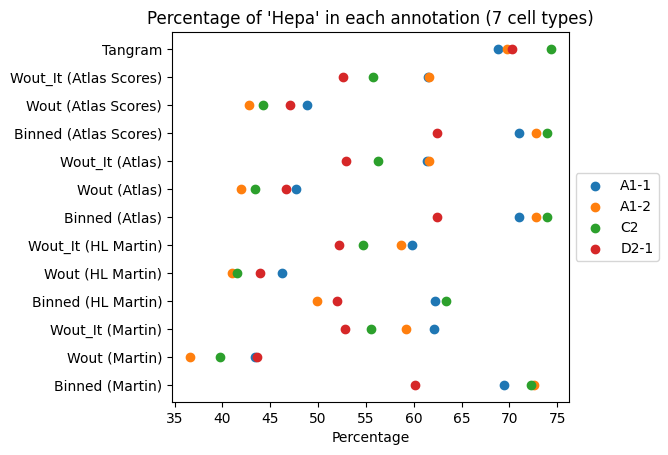

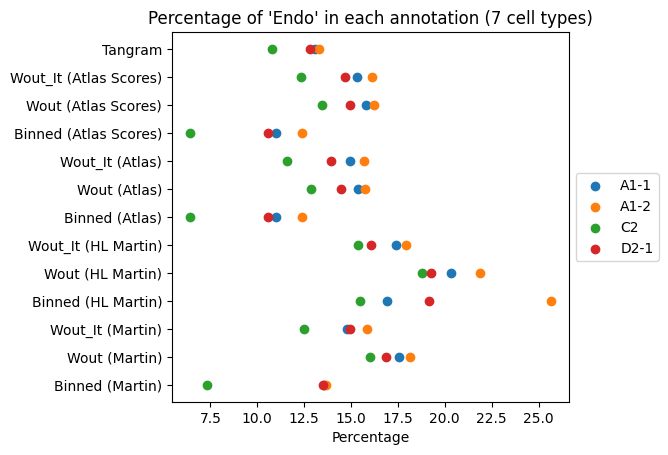

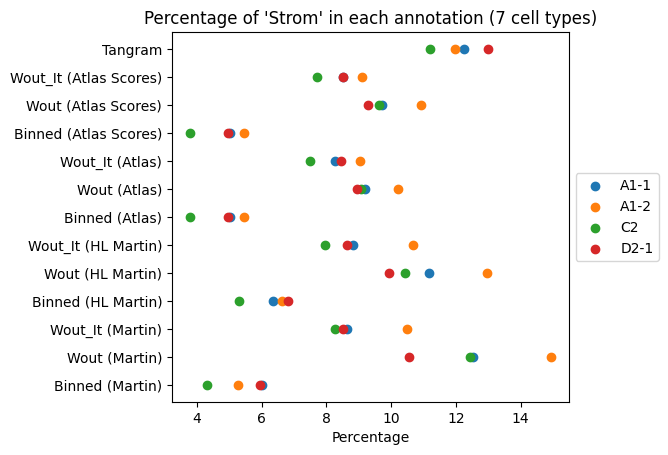

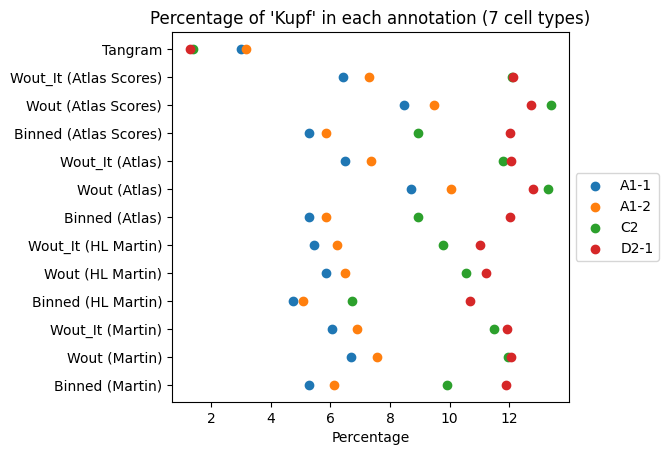

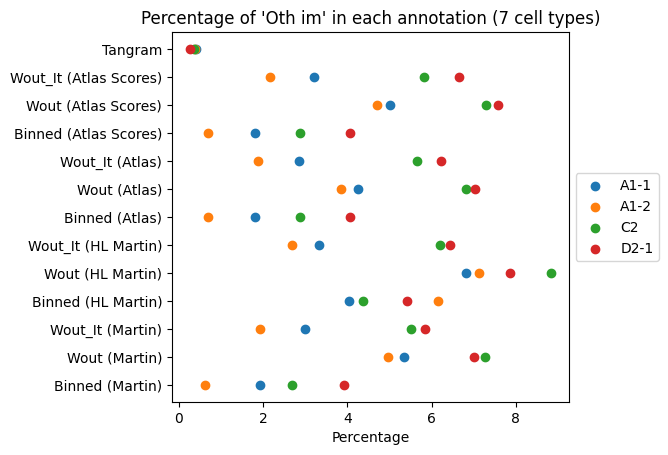

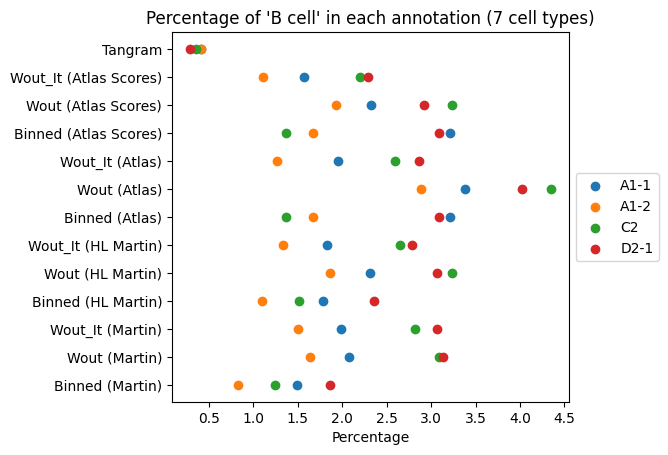

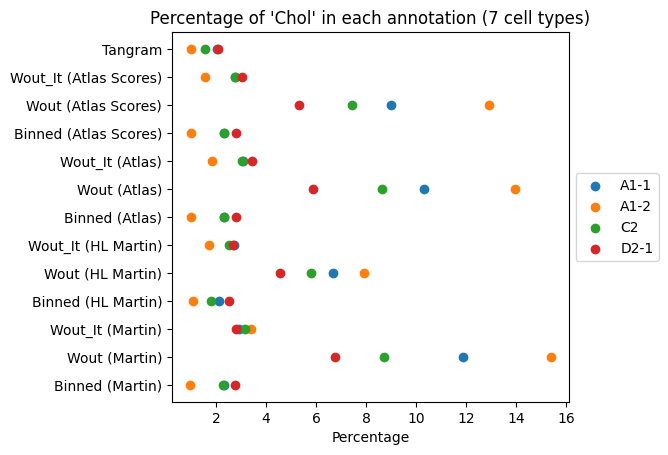

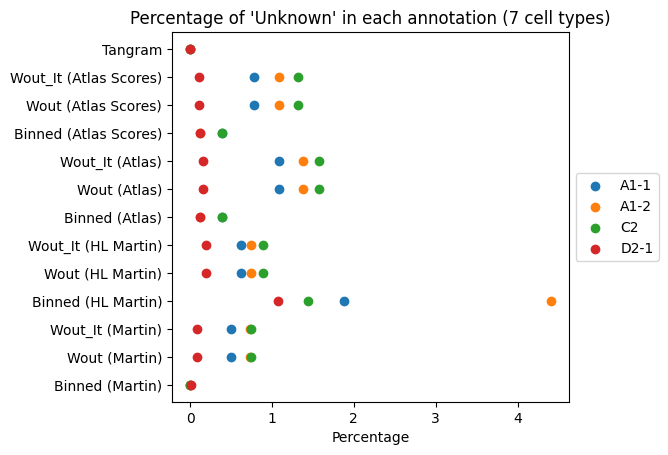

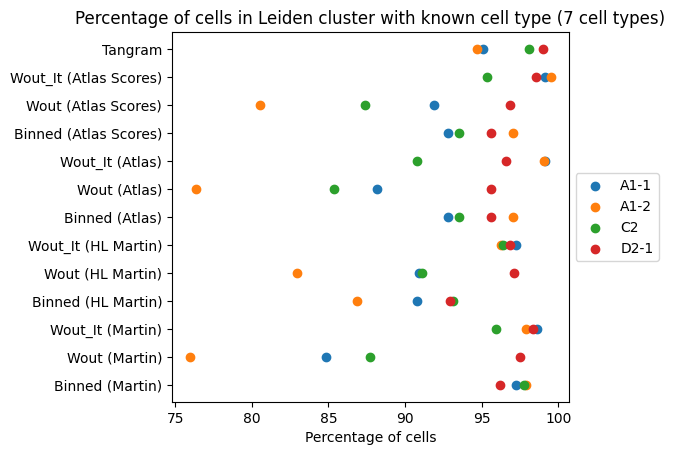

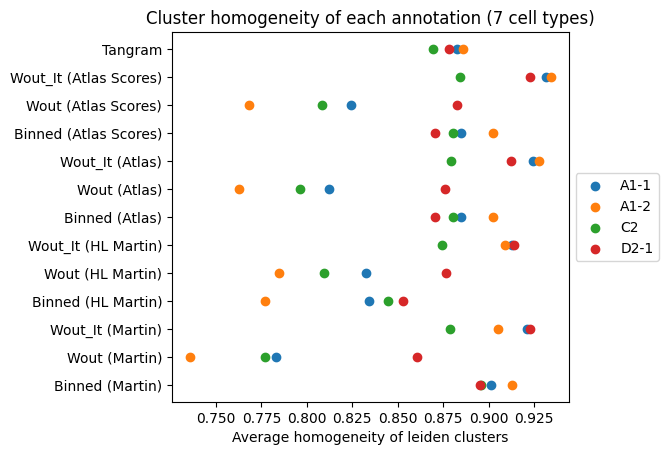

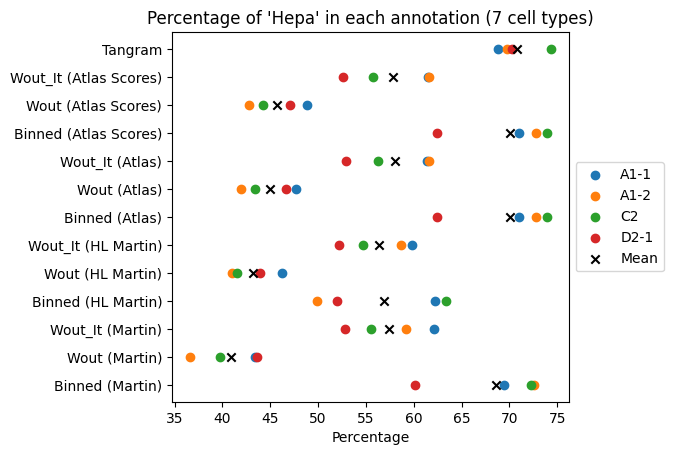

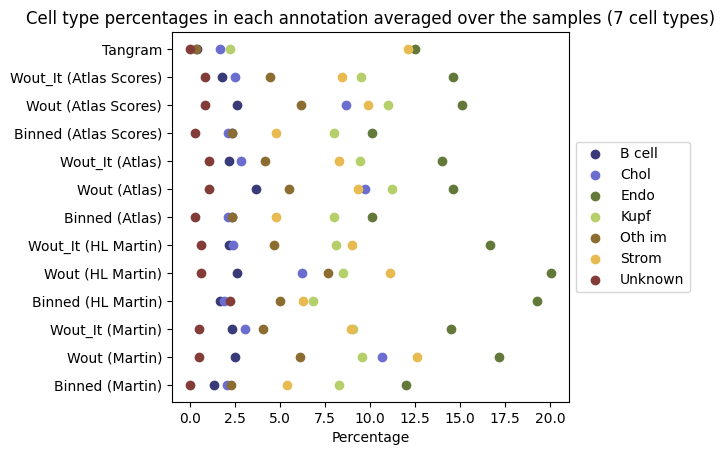

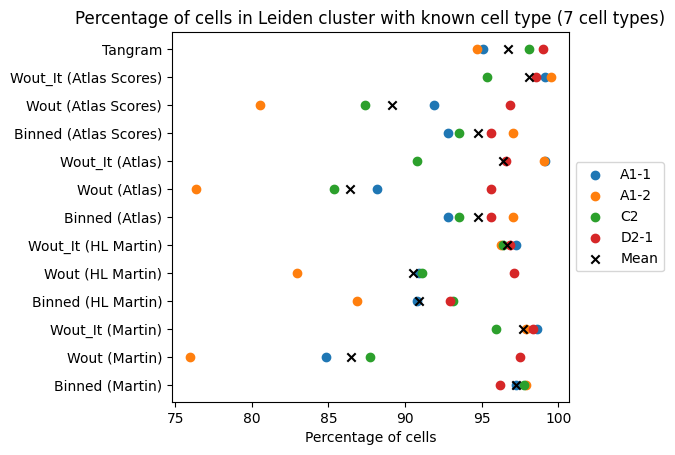

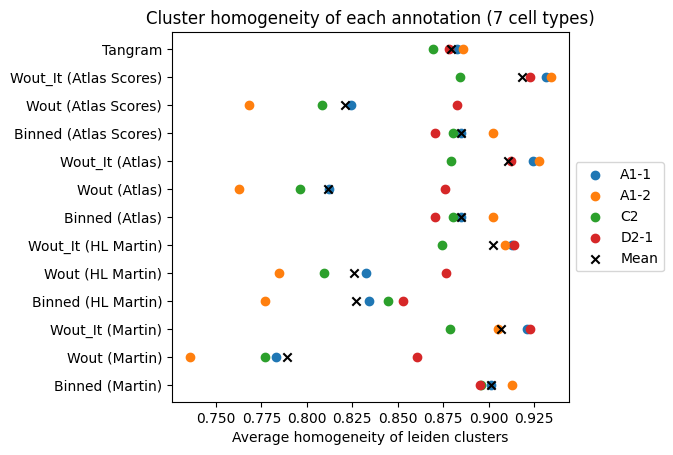

In [5]:
annotations_7 = ['annotation_score_genes_original_BasicMartin_7','annotation_own_score_genes_start_iterative_BasicMartin_7','annotation_own_score_genes_BasicMartin_7','annotation_score_genes_original_HLMartin_7','annotation_own_score_genes_start_iterative_HLMartin_7','annotation_own_score_genes_HLMartin_7','annotation_score_genes_original_Atlas_7','annotation_own_score_genes_start_iterative_Atlas_7','annotation_own_score_genes_Atlas_7','annotation_score_genes_original_Atlas_Scores_7','annotation_own_score_genes_start_iterative_Atlas_Scores_7','annotation_own_score_genes_Atlas_Scores_7','annotation_tangram_7']
output = compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations_7,names_anno_plot,chosen_ct='Hepa',save=True,saved_as='all_samples_perc_Hepa_7',suffix=' (7 cell types)')
output = compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations_7,names_anno_plot,chosen_ct='Endo',save=True,saved_as='all_samples_perc_Endo_7',suffix=' (7 cell types)')
output = compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations_7,names_anno_plot,chosen_ct='Strom',save=True,saved_as='all_samples_perc_Strom_7',suffix=' (7 cell types)')
output = compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations_7,names_anno_plot,chosen_ct='Kupf',save=True,saved_as='all_samples_perc_Kupf_7',suffix=' (7 cell types)')
output = compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations_7,names_anno_plot,chosen_ct='Oth im',save=True,saved_as='all_samples_perc_Oth_im_7',suffix=' (7 cell types)')
output = compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations_7,names_anno_plot,chosen_ct='B cell',save=True,saved_as='all_samples_perc_B_cell_7',suffix=' (7 cell types)')
output = compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations_7,names_anno_plot,chosen_ct='Chol',save=True,saved_as='all_samples_perc_Chol_7',suffix=' (7 cell types)')
output = compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations_7,names_anno_plot,chosen_ct='Unknown',save=True,saved_as='all_samples_perc_Unknown_7',suffix=' (7 cell types)')
output = compare_annotations_samples_cluster_homogeneity_percentage_unknown(anndata_objects,samples,annotations_7,names_anno_plot,save=True,saved_as='all_samples_perc_in_known_cluster_7',suffix=' (7 cell types)')
output = compare_annotations_samples_cluster_homogeneity(anndata_objects,samples,annotations_7,names_anno_plot,drop_cell_types=[],save=True,saved_as='all_samples_homogeneity_7',suffix=' (7 cell types)')
# averaged over samples
output = compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations_7,names_anno_plot,chosen_ct='Hepa',mean=True,save=True,saved_as='all_samples_perc_Hepa_mean_7',suffix=' (7 cell types)')
output = compare_annotations_samples_mean_composition(anndata_objects,annotations_7,names_anno_plot,drop_cell_types=['Hepa'],plot=True,save=True,saved_as='all_samples_perc_cell_types_mean_7',suffix=' (7 cell types)')
output = compare_annotations_samples_cluster_homogeneity_percentage_unknown(anndata_objects,samples,annotations_7,names_anno_plot,mean=True,save=True,saved_as='all_samples_perc_in_known_cluster_mean_7',suffix=' (7 cell types)')
output = compare_annotations_samples_cluster_homogeneity(anndata_objects,samples,annotations_7,names_anno_plot,drop_cell_types=[],mean=True,save=True,saved_as='all_samples_homogeneity_mean_7',suffix=' (7 cell types)')

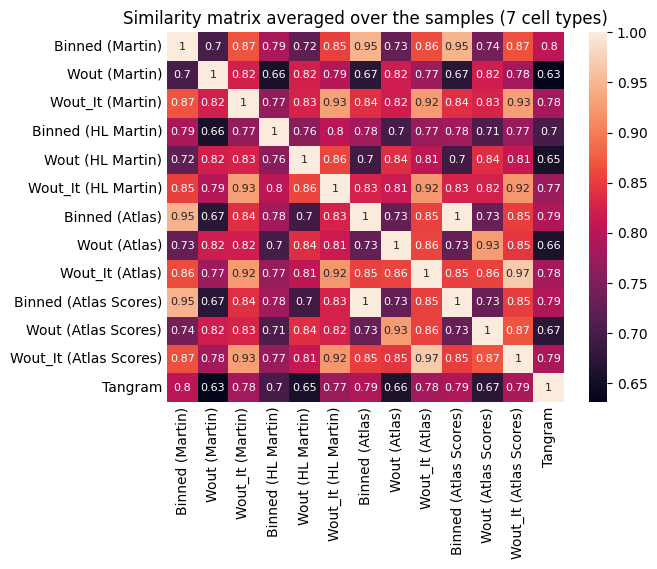

In [6]:
output = similarity_matrix_annotations_avg_samples(anndata_objects,annotations_7,names_anno_plot,save=True,saved_as='all_samples_similarity_matrix_7',suffix=' (7 cell types)')

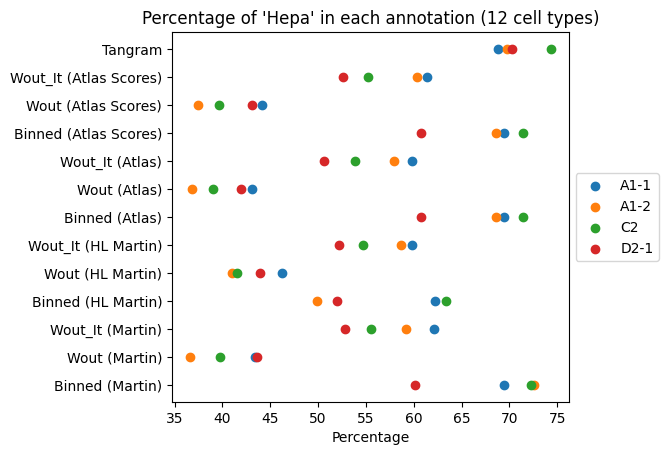

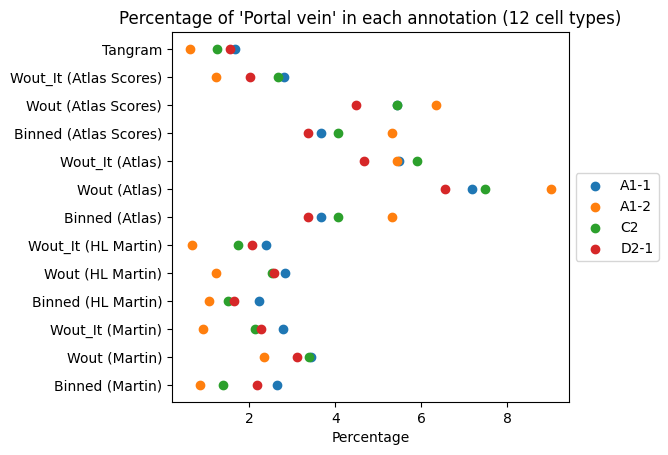

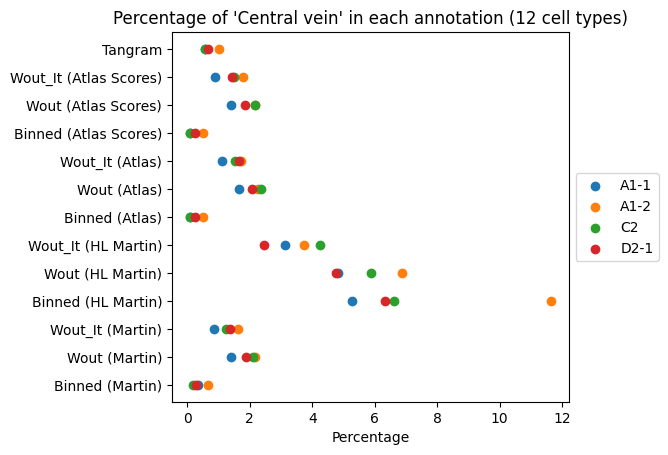

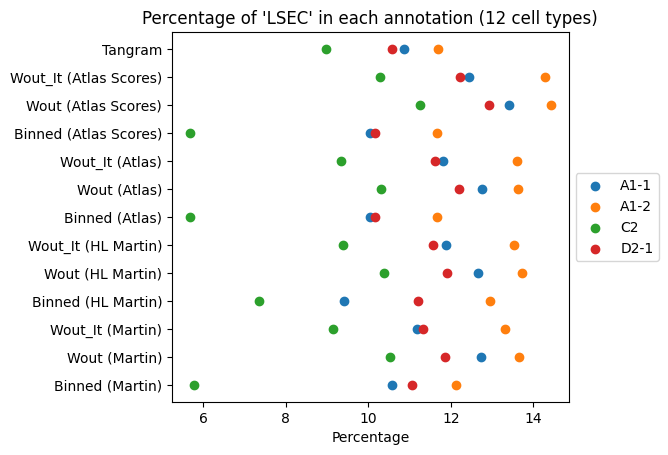

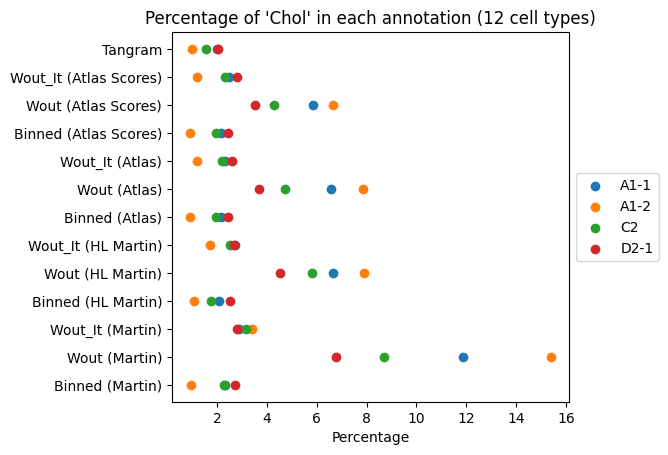

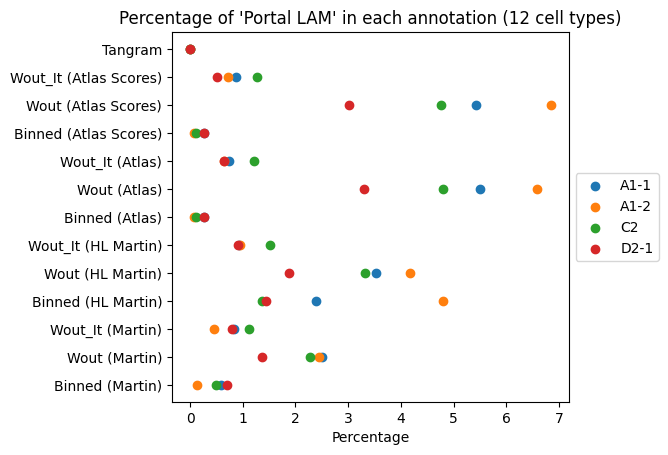

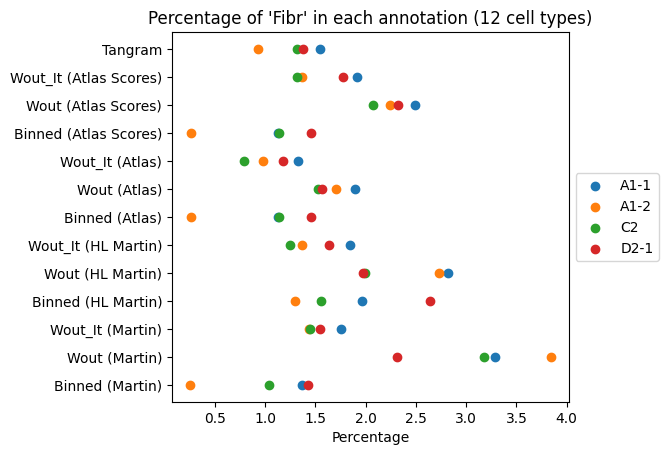

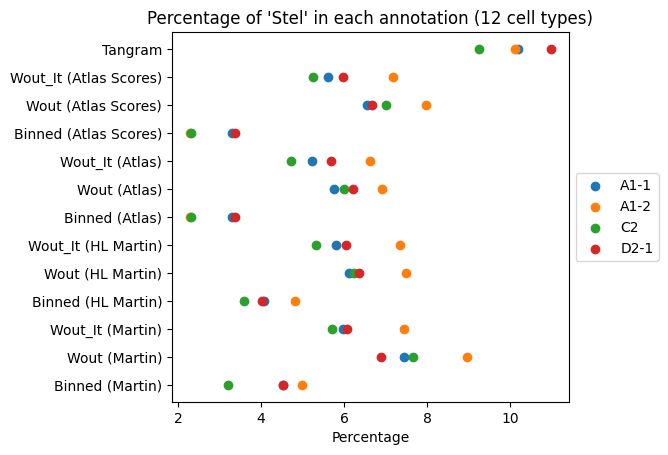

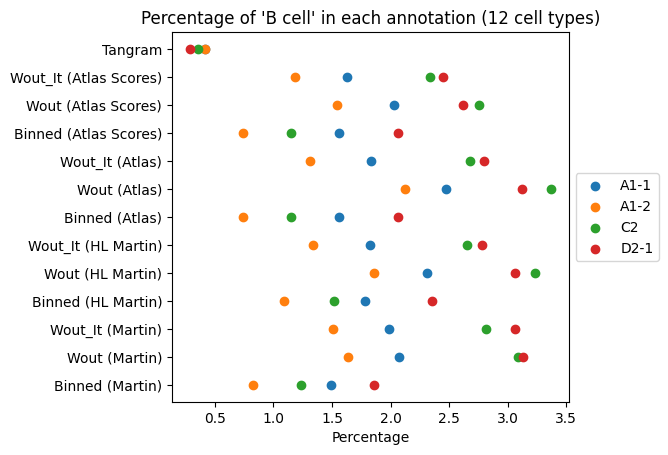

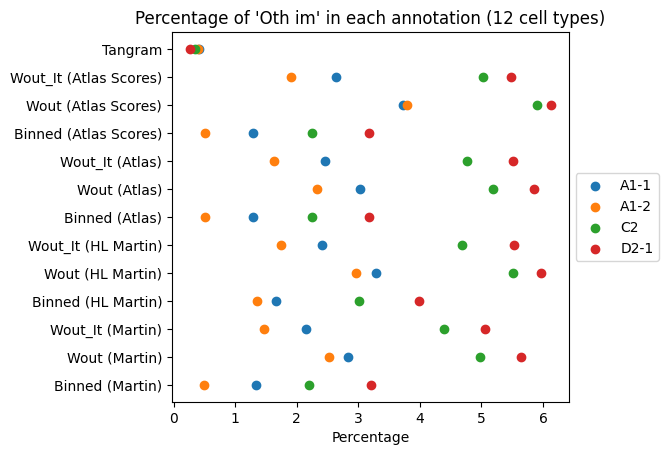

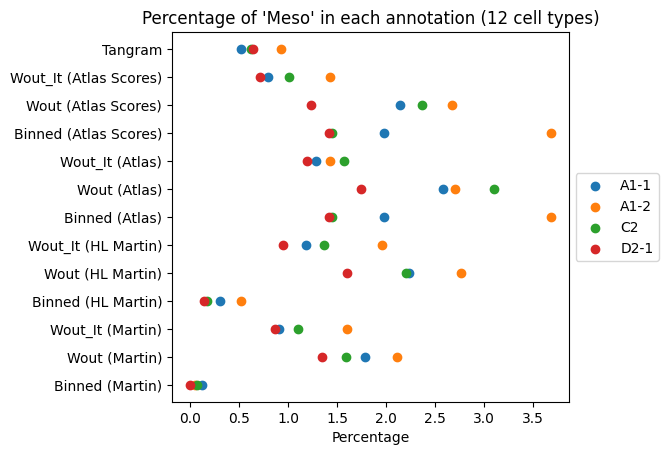

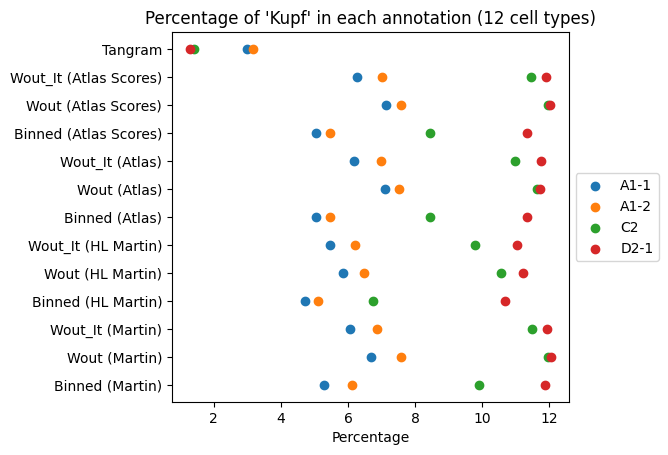

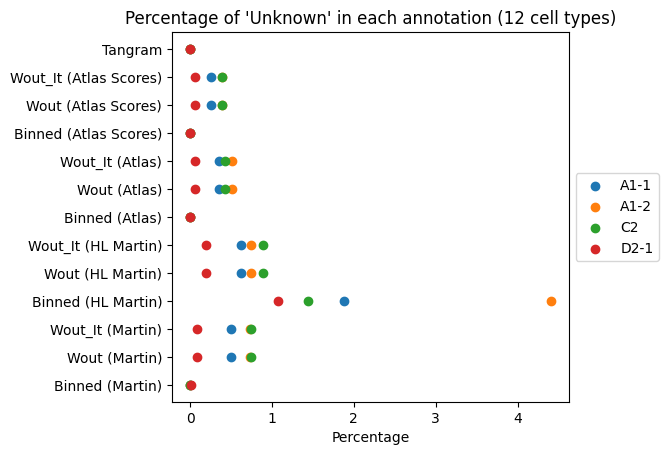

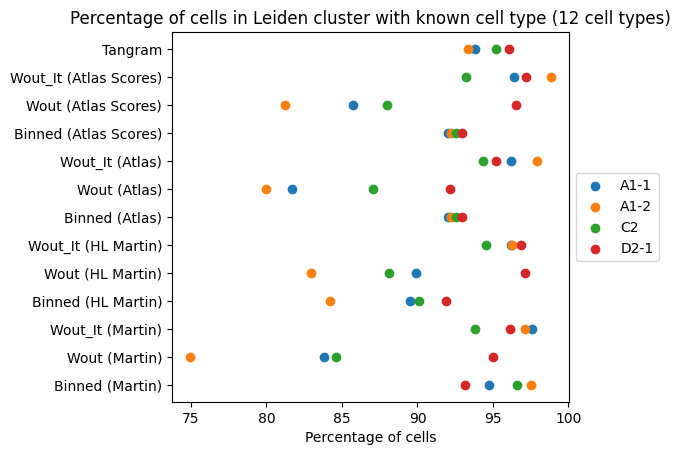

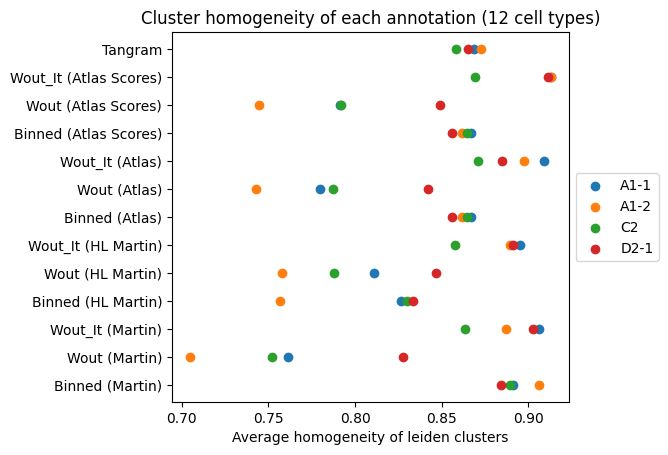

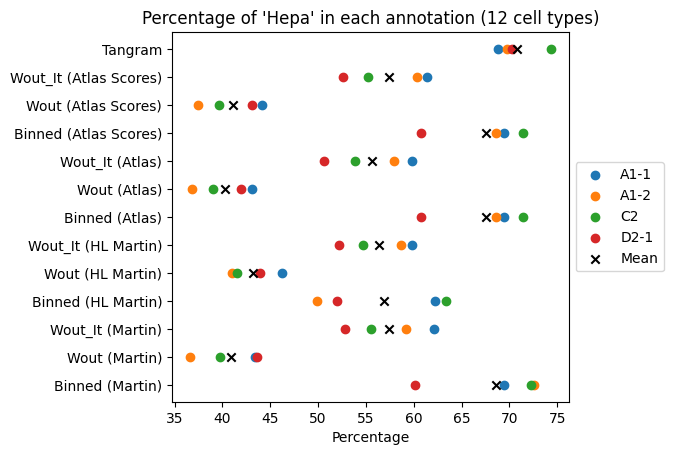

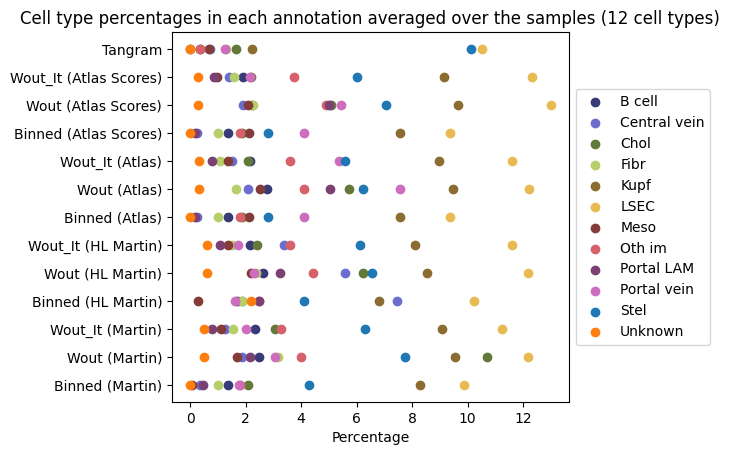

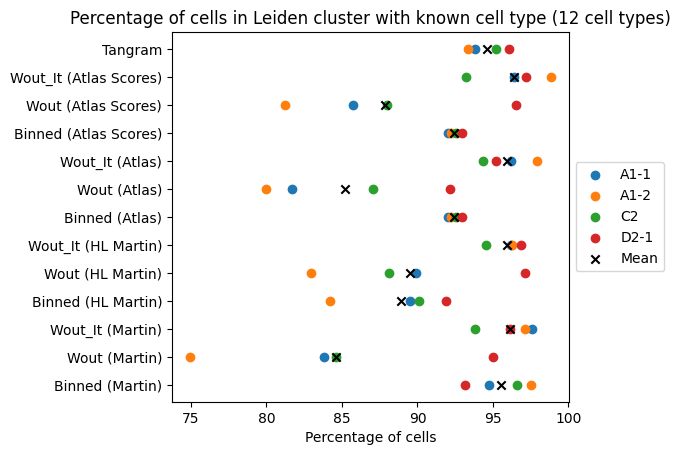

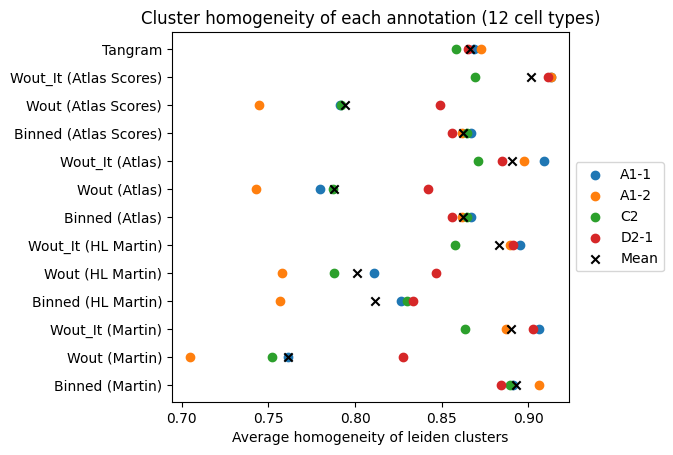

In [7]:
annotations_12 = ['annotation_score_genes_original_BasicMartin_12','annotation_own_score_genes_start_iterative_BasicMartin_12','annotation_own_score_genes_BasicMartin_12','annotation_score_genes_original_HLMartin_12','annotation_own_score_genes_start_iterative_HLMartin_12','annotation_own_score_genes_HLMartin_12','annotation_score_genes_original_Atlas_12','annotation_own_score_genes_start_iterative_Atlas_12','annotation_own_score_genes_Atlas_12','annotation_score_genes_original_Atlas_Scores_12','annotation_own_score_genes_start_iterative_Atlas_Scores_12','annotation_own_score_genes_Atlas_Scores_12','annotation_tangram_11']
output = compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations_12,names_anno_plot,chosen_ct='Hepa',save=True,saved_as='all_samples_perc_Hepa_12',suffix=' (12 cell types)')
output = compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations_12,names_anno_plot,chosen_ct='Portal vein',save=True,saved_as='all_samples_perc_Portal_vein_12',suffix=' (12 cell types)')
output = compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations_12,names_anno_plot,chosen_ct='Central vein',save=True,saved_as='all_samples_perc_Central_vein_12',suffix=' (12 cell types)')
output = compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations_12,names_anno_plot,chosen_ct='LSEC',save=True,saved_as='all_samples_perc_LSEC_12',suffix=' (12 cell types)')
output = compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations_12,names_anno_plot,chosen_ct='Chol',save=True,saved_as='all_samples_perc_Chol_12',suffix=' (12 cell types)')
output = compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations_12,names_anno_plot,chosen_ct='Portal LAM',save=True,saved_as='all_samples_perc_Portal_LAM_12',suffix=' (12 cell types)')
output = compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations_12,names_anno_plot,chosen_ct='Fibr',save=True,saved_as='all_samples_perc_Fibr_12',suffix=' (12 cell types)')
output = compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations_12,names_anno_plot,chosen_ct='Stel',save=True,saved_as='all_samples_perc_Stel_12',suffix=' (12 cell types)')
output = compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations_12,names_anno_plot,chosen_ct='B cell',save=True,saved_as='all_samples_perc_B_cell_12',suffix=' (12 cell types)')
output = compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations_12,names_anno_plot,chosen_ct='Oth im',save=True,saved_as='all_samples_perc_Oth_im_12',suffix=' (12 cell types)')
output = compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations_12,names_anno_plot,chosen_ct='Meso',save=True,saved_as='all_samples_perc_Meso_12',suffix=' (12 cell types)')
output = compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations_12,names_anno_plot,chosen_ct='Kupf',save=True,saved_as='all_samples_perc_Kupf_12',suffix=' (12 cell types)')
output = compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations_12,names_anno_plot,chosen_ct='Unknown',save=True,saved_as='all_samples_perc_Unknown_12',suffix=' (12 cell types)')
output = compare_annotations_samples_cluster_homogeneity_percentage_unknown(anndata_objects,samples,annotations_12,names_anno_plot,save=True,saved_as='all_samples_perc_in_known_cluster_12',suffix=' (12 cell types)')
output = compare_annotations_samples_cluster_homogeneity(anndata_objects,samples,annotations_12,names_anno_plot,drop_cell_types=[],save=True,saved_as='all_samples_homogeneity_12',suffix=' (12 cell types)')
# averaged over samples
output = compare_annotations_samples_cell_type_percentage(anndata_objects,samples,annotations_12,names_anno_plot,chosen_ct='Hepa',mean=True,save=True,saved_as='all_samples_perc_Hepa_mean_12',suffix=' (12 cell types)')
output = compare_annotations_samples_mean_composition(anndata_objects,annotations_12,names_anno_plot,drop_cell_types=['Hepa'],plot=True,save=True,saved_as='all_samples_perc_cell_types_mean_12',suffix=' (12 cell types)')
output = compare_annotations_samples_cluster_homogeneity_percentage_unknown(anndata_objects,samples,annotations_12,names_anno_plot,mean=True,save=True,saved_as='all_samples_perc_in_known_cluster_mean_12',suffix=' (12 cell types)')
output = compare_annotations_samples_cluster_homogeneity(anndata_objects,samples,annotations_12,names_anno_plot,drop_cell_types=[],mean=True,save=True,saved_as='all_samples_homogeneity_mean_12',suffix=' (12 cell types)')

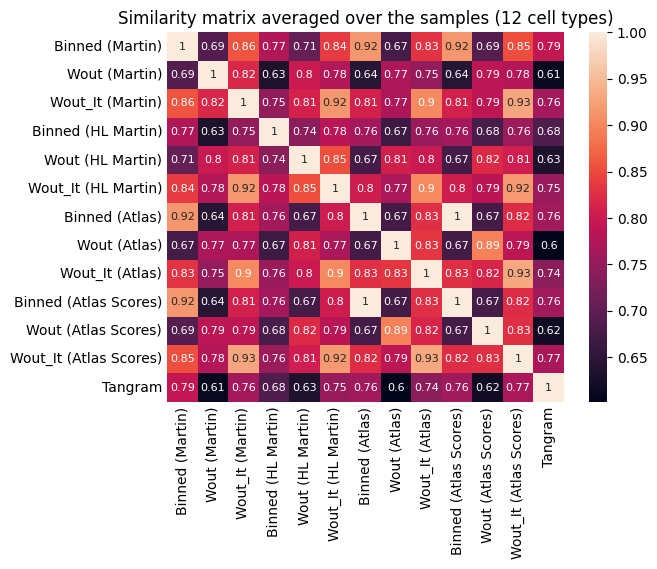

In [8]:
output = similarity_matrix_annotations_avg_samples(anndata_objects,annotations_12,names_anno_plot,save=True,saved_as='all_samples_similarity_matrix_12',suffix=' (12 cell types)')